In [7]:
import casadi as cd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
n = 6
m = 1
# MX symbolics
X = cd.MX.sym("X",n,m)
Y = cd.sumAll(X**2 + X)
print(Y)

AttributeError: module 'casadi' has no attribute 'sumAll'

In [8]:
# Decision variables
x = cd.SX.sym("x",3)

# Parameters
p = [5.00,1.00]

# Objective function
f = x[0]*x[0] + x[1]*x[1] + x[2]*x[2]

# Concatenate nonlinear constraints
g = cd.vertcat(( \
       6*x[0] + 3*x[1] + 2*x[2] - p[0],
    p[1]*x[0] +   x[1] -   x[2] -   1))

# Nonlinear bounds
lbg = [0.00, 0.00]
ubg = [0.00, 0.00]

# Input bounds for the optimization variables
lbx = [0.00, 0.00, 0.00]
ubx = [ cd.inf,  cd.inf,  cd.inf]

# Initial guess for the decision variables
x0  = [0.15, 0.15, 0.00]

# Create NLP solver
nlp = cd.SXFunction(cd.nlpIn(x=x),cd.nlpOut(f=f, g=g))
solver = cd.NlpSolver("ipopt", nlp)
# Initialize solver
solver.init()

# Pass the bounds and the initial values
solver.setInput( x0, "x0")
solver.setInput(lbx, "lbx")
solver.setInput(ubx, "ubx")
solver.setInput(lbg, "lbg")
solver.setInput(ubg, "ubg")

# Solve NLP
solver.evaluate()

NotImplementedError: Wrong number or type of arguments for overloaded function '_vertcat'.
  Possible prototypes are:
    _vertcat([Sparsity])
    _vertcat([DM])
    _vertcat([SX])
    _vertcat([MX])
  You have: '(((SX,SX)))'


## Quadratic Programming

In [9]:
from casadi import *

In [19]:
x = SX.sym('x',2)
A = SX.sym('A',2,2)
e = mtimes(A,sin(x))
print(e)

@1=sin(x_0), @2=sin(x_1), [((A_0*@1)+(A_2*@2)), ((A_1*@1)+(A_3*@2))]


In [29]:
r = SX.sym('r')
V = 4/3*pi*r**3
A = jacobian(V,r) 
f = Function('f',[r],[A])

In [34]:
float(f(2))

50.26548245743669

In [35]:
c2 = DM([-7000, -6000])
A2 = DM([[4000,3000],[60,80]])
b2 = DM([100000,2000])
lb = [0,0]
ub = [inf,inf]
x = SX.sym('x',2)
e = mtimes( A2,x )-b2
f2 = mtimes(c2.T, x)
prob_struct = dict( x=x, f=f2, g=e )
solver = qpsol('solver','qpoases',prob_struct)


qpOASES -- An Implementation of the Online Active Set Strategy.
Copyright (C) 2007-2015 by Hans Joachim Ferreau, Andreas Potschka,
Christian Kirches et al. All rights reserved.

qpOASES is distributed under the terms of the 
GNU Lesser General Public License 2.1 in the hope that it will be 
useful, but WITHOUT ANY WARRANTY; without even the implied warranty 
of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
See the GNU Lesser General Public License for more details.



In [36]:
sol = solver(x0=[1,1],lbg=[-inf,-inf],ubg=[0,0],lbx = lb, ubx = ub)


qpOASES -- An Implementation of the Online Active Set Strategy.
Copyright (C) 2007-2015 by Hans Joachim Ferreau, Andreas Potschka,
Christian Kirches et al. All rights reserved.

qpOASES is distributed under the terms of the 
GNU Lesser General Public License 2.1 in the hope that it will be 
useful, but WITHOUT ANY WARRANTY; without even the implied warranty 
of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
See the GNU Lesser General Public License for more details.



####################   qpOASES  --  QP NO.   1   #####################

    Iter   |    StepLength    |       Info       |   nFX   |   nAC    
 ----------+------------------+------------------+---------+--------- 
       0   |   1.326355e-04   |   REM BND    0   |     1   |     0   
       1   |   1.016979e-15   |   ADD CON    0   |     1   |     1   
       2   |   2.719987e-04   |   REM BND    1   |     0   |     1   
       3   |   5.844708e-14   |   ADD BND    0   |     1   |     1   
       4   |   6.402828e

In [37]:
sol['x']

DM([14.2857, 14.2857])

In [ ]:
float(sol['f'])

## Nonlinear programming

In [38]:
x = SX.sym('x')
y = SX.sym('y')
z = y-(1-x)**2
f = x**2+100*z**2
P = dict(x=vertcat(x,y),f=f)
F = nlpsol('F','ipopt',P)

In [39]:
r = F(x0=[2.5,3.0])


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

In [40]:
print(r['x'])

[8.09119e-10, 1]


In [48]:
x = SX.sym('x')
y = SX.sym('y')
z = SX.sym('z')
f = x**2+100*z**2
g = z+(1-x**2-y)
P = dict(f=f,g=g,x=vertcat(x,y,z))

In [49]:
F=nlpsol('F','ipopt',P)

In [51]:
r = F(x0=[2.5, 3.0, 0.75],ubg=0, lbg=0)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  6.2500000e+01 7.50e+00 9.69e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [54]:
r['x']

DM([0, 1, 0])

In [62]:
x = SX.sym('x')
y = SX.sym('y')
f = -exp(-(x**2+y**2))+0.3*sin(x**3/10+y**2)+1.2
g = (x+2)**2-y**3/2
P = dict(f=f, x=vertcat(x,y))
F = nlpsol( 'F','ipopt',P )
r = F(x0 = [-1,-1],ubg=3, lbg=1)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.2996628e+00 0.00e+00 6.44e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [63]:
r['x'].full()

array([[ 7.73887391e-16],
       [-2.77105505e-23]])

In [64]:
f

SX((((0.3*sin((((x*sq(x))/10)+sq(y))))-exp((-(sq(x)+sq(y)))))+1.2))

## Part 2 ODEs

In [65]:
x = SX.sym('x')
z = SX.sym('z')
p = SX.sym('p')

In [68]:
dae = dict( x=x,z=z,p=p,ode=z+p,alg=z*cos(z)-x)

In [69]:
F=integrator('F','idas', dae) # differential algebric solver

In [70]:
print(F)

F:(x0,z0,p,u[0],adj_xf[],adj_zf[],adj_qf[])->(xf,zf,qf[0],adj_x0[],adj_z0[],adj_p[],adj_u[]) IdasInterface


In [71]:
r=F(x0=0,z0=0.1,p=0.1) # p is parameter

In [72]:
print(r['xf'])

0.1724


In [76]:
r['xf']

DM(0.1724)

In [100]:
x = SX.sym('x',2)
p = SX.sym('p')
z = 1-x[1]**2
f=vertcat(z*x[0]-x[1]+p,x[0])
dae = dict(x=x,p=p,ode=f)

In [101]:
op = dict(t0=0,tf=1)
F = integrator('F','cvodes',dae,op)

In [80]:
r = F(x0=[0,1],p=0.1)

In [81]:
r['xf']

DM([-0.922372, 0.551573])

### Optimal Control

In [82]:
a = SX.sym('a')
b = SX.sym('b')
sum1 = a+b
prod1 = a*b
F1 = Function('F1',[a,b],[sum1,prod1],['a','b'],['sx','xp'])

In [83]:
s1 = F1(a=2,b=3)

In [84]:
print(s1['xp'].full())

[[6.]]


In [85]:
a = '1234567890'
a[::3]

'1470'

In [124]:
# x = SX.sym('x',2)
# p = SX.sym('p')
# z = 1-x[1]**2
# f=vertcat(z*x[0]-x[1]+p,x[0])
# dae = dict(x=x,p=p,ode=f)
# op = dict(t0=0,tf=1)
# F = integrator('F','cvodes',dae,op)

T = 10
N = 20

x1 = MX.sym('x1')
x2 = MX.sym('x2')
x = vertcat(x1, x2)
u = MX.sym('u')

xdot = vertcat( (1-x2**2)*x1 - x2 + u, x1 )

# dae = dict(x=x,p=u,ode=f)
# op = dict(t0=0,tf=1)
# F = integrator('F','cvodes',dae,op)

#Objective
L = x1**2 + x2**2 + u**2

if False:
    # CVODES from the SUNDAILS suite
    dae = dict( x=x, p=p, ode=xdot)#, quad=L) # dae = dict(x=x,p=p,ode=f)
    #dae = { 'x':x, 'p':p, 'ode':xdot , 'quad':L }
    opts = dict( tf=T/N )# op = dict(t0=0,tf=1)
    F = integrator('F', 'cvodes', dae, opts)  #F = integrator('F','cvodes',dae,op)
else:
    M = 4 # RK4 steps per interval
    DT = T/N/M
    f = Function('f', [x,u], [xdot, L])
    X0 = MX.sym('X0',2)
    U = MX.sym('U')
    X = X0
    Q = 0
    for j in range(M):
        k1, k1_q = f( X , U )
        k2, k2_q = f( X + DT/2 * k1, U )
        k3, k3_q = f( X + DT/2 * k2, U )
        k4, k4_q = f( X + DT * k3, U )
        X = X + DT/6 * ( k1 + 2*k2 + 2*k3 + k4 )
        Q = Q + DT/6 * ( k1_q + 2*k2_q + 2*k3_q + k4_q )
    F = Function('F', [X0,U], [X, Q], ['x0', 'p'], ['xf', 'qf'])

In [125]:
# Start with empty NLP
w = []
w0 = []
lbw = []
ubw = []
J = 0
g = []
lbg = []
ubg = []

# Lift initial conditions
Xk = MX.sym('X0',2)
w += [Xk]
lbw += [0, 1]
ubw += [0, 1]
w0 += [0, 1]

In [126]:
for k in range(N):
    # New NLP variable for control
    Uk = MX.sym('U_' + str(k))
    w += [Uk]
    lbw += [-1]
    ubw += [1]
    w0 += [0]
    
    # Integrate till the end of the interval
    Fk = F(x0=Xk, p=Uk)
    Xk_end = Fk['xf']
    J = J + Fk['qf']
    
    # New NLP variable for state at the end of interval
    Xk = MX.sym('X_' + str(k+1), 2)
    w += [Xk]
    lbw += [-0.25, -inf ]
    ubw += [inf, inf]
    w0 += [0, 0]
    
    # Add inequality constraint
    g += [Xk_end - Xk]
    lbg += [0, 0]
    ubg += [0, 0]

In [127]:
# Create a NLP solver
prob = {'f':J, 'x':vertcat(*w), 'g':vertcat(*g) }
solver = nlpsol('solver', 'ipopt', prob)

In [128]:
# Solve the NLP
sol = solver(x0=w0, lbx=lbw, ubx=ubw, lbg=lbg, ubg=ubg)
w_opt = sol['x'].full().flatten()

# Plot
x1_opt = w_opt[0::3]
x2_opt = w_opt[1::3]
u_opt = w_opt[2::3]

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      156
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      115

Total number of variables............................:       60
                     variables with only lower bounds:       20
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  5.0098016e-01 8.76e-01 7.51e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

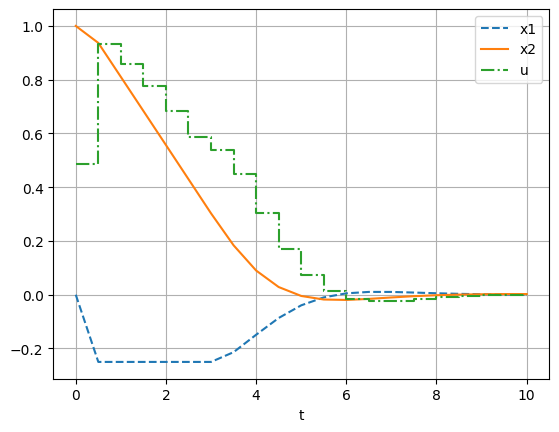

In [129]:
tgrid = [T/N*k for k in range(N+1)]
import matplotlib.pyplot as plt
plt.figure(1)
plt.clf()
plt.plot(tgrid, x1_opt, '--')
plt.plot(tgrid, x2_opt, '-')
plt.step(tgrid, vertcat(DM.nan(1), u_opt), '-.')
plt.xlabel('t')
plt.legend(['x1', 'x2', 'u'])
plt.grid()
plt.show()